# 1. Loading Modules

In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from scipy import stats

# 2. Model Parameters 
prob - Probability of an Edge occuring   
N - Number of Nodes


In [2]:
def Erdos_Renyi(prob,N=50):
    """
    Simulating Erdos_Renyi Random Graph Model
    
    Parameters
    ----------
    prob: int between [0,1] 
        Probability of an Edge occuring
    N: int
        Number of Nodes Of Graph
    
    Returns
    -------
    G - Graph Data Structure
    """
    ## Creating the Adjacency Matrix
    Adj = np.random.choice(2,(N,N),p=[1-prob,prob])

    ## Create Node Matrix
    nodes = np.arange(N)
    
    ## Construct Matrix from networkx module
    G = nx.from_numpy_matrix(Adj)
    G.add_nodes_from(np.arange(N))
    
    ## Return Graph
    return G    

In [3]:
class values_input():
    def __init__(self, 
                 prob = "e.g. '0.2'", 
                 N = "e.g. '10'"                  
                ):
        self.prob = widgets.Text(description = 'Prob',value = prob)
        self.N = widgets.Text(description = 'No: of Nodes',value = N)
        self.prob.on_submit(self.handle_submit)
        self.prob.on_submit(self.handle_submit)
        display(self.prob, self.N)

    def handle_submit(self, text):
        self.v = text.value
        return self.v
    
print("Enter the values for the variables in the following fields")
f = values_input()

Enter the values for the variables in the following fields


Text(value="e.g. '0.2'", description='Prob')

Text(value="e.g. '10'", description='No: of Nodes')

In [6]:

print("Values Inputed: " ,f.prob.value, f.N.value)


Values Inputed:  0.4 20


/home/akhil/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


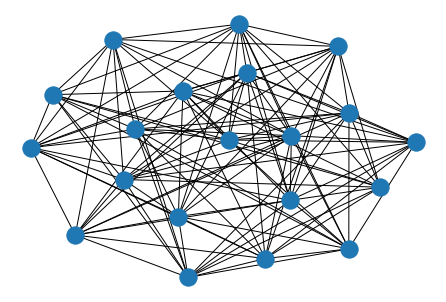

In [7]:
# Constructing Graph Network
G = Erdos_Renyi(float(f.prob.value),int(f.N.value))

# Drawing Graph
nx.draw(G)
show_inline_matplotlib_plots()

# 3. Estimating Model Parameters


In [10]:
Adj = nx.adjacency_matrix(G)
p = float(f.prob.value)
N = len(list(G.nodes))

## 3.1 Average Node Degree in Graph

The Average Degree of a Node in the Erdos-Renyi Model is given by *prob(N-1)*. 

In [11]:
## Finding Average Degree from Adjacency
A_sum = Adj.sum(axis=1)
Avg_degree = np.average(A_sum)
print("Average Degree calculated from Graph:",Avg_degree)

## Finding Through Formula
Avg_degree_formula = p * (N-1)
print("Average Degree calculated from Formula:" ,Avg_degree_formula)

Average Degree calculated from Graph: 12.25
Average Degree calculated from Formula: 7.6000000000000005


## 3.2 Diameter of Graph

The Diameter of the Graph in the Erdos-Renyi Model is given by *log(N)/log(z)*. *z* is the average node degree in the graph.


In [12]:
## Finding from Graph
diameter = nx.diameter(G)
print("Diameter of the Graph calculated from Graph:",diameter)

## Finding Through Formula
diameter_formula = np.log(N) / np.log(Avg_degree)
print("Diameter of the Graph calculated from Formula:" ,diameter_formula)

Diameter of the Graph calculated from Graph: 2
Diameter of the Graph calculated from Formula: 1.1956500746314433


## 3.3 Clustering Coefficient

The Clustering Coefficient for the Erdos-Renyi Model is given by *prob*.

In [14]:
## Finding from Graph
ccoeff = nx.average_clustering(G)
print("Clustering Coefficient calculated from Graph:",ccoeff)

## Finding Through Formula
print("Clustering Coefficient calculated from Formula:" ,p)

Clustering Coefficient calculated from Graph: 0.5851126651126652
Clustering Coefficient calculated from Formula: 0.4


# 4. Python In-built function

The Networkx module also contains an in-built function that can be used directly to generate Erdös-Renyi Random Graph Models.

/home/akhil/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


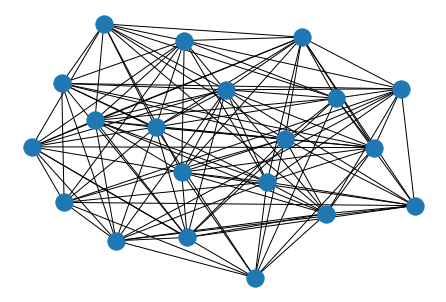

In [15]:
G2 = nx.erdos_renyi_graph(int(f.N.value),float(f.prob.value),seed=23,directed=False)

# Drawing Graph
nx.draw(G)
show_inline_matplotlib_plots()

# 5. Analysis of Model Parameters


In [17]:
# Average Degree Analysis for various graphs
Avg_degree = []
diameter = []
ccoeff = []
upper_limit = 100

# Pre-determined Probability Value
p = 0.5


for i in range(2,upper_limit):
    # Constructing Graph Network    
    G = Erdos_Renyi(p,i)
    Adj = nx.adjacency_matrix(G)
    ## Finding Average Degree from Adjacency
    A_sum = Adj.sum(axis=1)
    Avg_degree.append(np.average(A_sum))
    ## Finding Diameter from Graph
    diameter.append(nx.diameter(G))
    ## Finding Clustering Coeffcient from Graph
    ccoeff.append(nx.average_clustering(G))


## 5.1 Average Node Degree in Graph

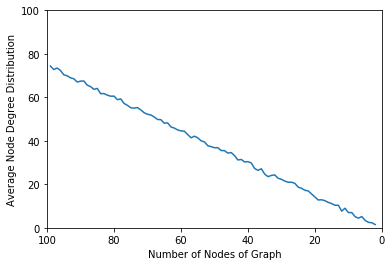

In [18]:
# Plotting
plt.plot(np.arange(2,upper_limit),Avg_degree)
plt.ylabel("Average Node Degree Distribution")
plt.xlabel("Number of Nodes of Graph")
plt.axis([upper_limit,0,0,upper_limit])
plt.show()

## 5.2 Diameter of Graph

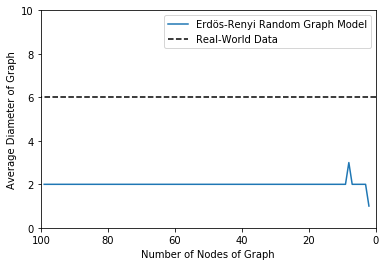

In [19]:
# Plotting
plt.plot(np.arange(2,upper_limit),diameter)
plt.hlines(6,0,upper_limit,linestyle="dashed")
plt.ylabel("Average Diameter of Graph")
plt.xlabel("Number of Nodes of Graph")
plt.legend(labels=["Erdös-Renyi Random Graph Model", "Real-World Data"])
plt.axis([upper_limit,0,0,10])
plt.show()

## 5.3 Clustering Coefficient

[100, 0, 0, 1]

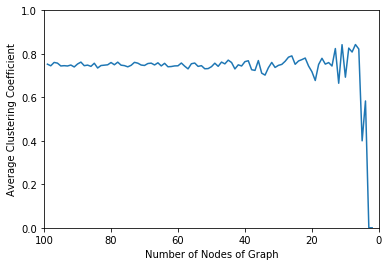

In [20]:
# Plotting
plt.plot(np.arange(2,upper_limit),ccoeff)
plt.ylabel("Average Clustering Coefficient")
plt.xlabel("Number of Nodes of Graph")
plt.axis([upper_limit,0,0,1])